# Projet Data Management
Nicolas Dumont & Julien Vion

# 1 - Téléchargement des données

In [1]:
# Importation des librairies nécessaires
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Récupération des données et transformation en dataframe

df = gpd.read_file("du-vert-pres-de-chez-moi.geojson")

df

,commentair,arrondisse,type_veget,adresse,numero,etat_de_la_proposition,avancement,propositio,geometry
0,-,75008.0,Pot ou bac à fleurs,rue corvetto,S2014G3193,proposition réalisable et retenue dans les 200...,Réalisé,-,POINT (2.31833 48.87950)
1,Tonelle,75004.0,Mur végétalisé,1 Rue du Renard,S2014H3595,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car il exis...,POINT (2.35144 48.85761)
2,Passage piéton mal aménagé pour passage pousse...,75011.0,Jardinière en pleine terre,2 Rue Pelée,S2014G2801,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car elle co...,POINT (2.37019 48.85980)
3,pas de commentaires,75011.0,Mur végétalisé,19 Rue Alphonse Baudin,S2014I4684,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car le trot...,POINT (2.37005 48.86125)
4,pas de commentaires,75013.0,Plantation d?arbre,124 Boulevard Vincent Auriol,S2014I1994,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car le trot...,POINT (2.36236 48.83326)
...,...,...,...,...,...,...,...,...,...
1600,-,75013.0,Mur végétalisé,21 Avenue d'Italie,S2014G4372,proposition réalisable techniquement mais non ...,-,-,POINT (2.35651 48.82882)
1601,mur qui donne sur la réserve d'eau de la rue s...,75020.0,Mur végétalisé,18 Rue Stendhal,S2014I5143,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car elle co...,POINT (2.40186 48.86155)
1602,-,75010.0,Mur végétalisé,5-7 Rue Legouvé,S2014G3619,proposition réalisable techniquement mais non ...,-,-,POINT (2.36135 48.87256)
1603,-,75012.0,Pot ou bac à fleurs,Rue Marie Benoist,S2014H177,proposition réalisable techniquement mais non ...,-,-,POINT (2.39351 48.84661)


# 2 - Description des données

In [3]:
# Nous commencons par vérifier l'état de nos données
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   commentair              1603 non-null   object  
 1   arrondisse              1605 non-null   float64 
 2   type_veget              1602 non-null   object  
 3   adresse                 1599 non-null   object  
 4   numero                  1565 non-null   object  
 5   etat_de_la_proposition  1604 non-null   object  
 6   avancement              1605 non-null   object  
 7   propositio              1601 non-null   object  
 8   geometry                1605 non-null   geometry
dtypes: float64(1), geometry(1), object(7)
memory usage: 113.0+ KB


In [4]:
# On remplace les valeurs manquantes par une chaine de caractères signifiant la présence d'une valeur manquante.
df.arrondisse = df.arrondisse.astype("int64").astype("str")

for column in df.columns:
    df[column].fillna("Pas de " + column, inplace=True)
    
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   commentair              1605 non-null   object  
 1   arrondisse              1605 non-null   object  
 2   type_veget              1605 non-null   object  
 3   adresse                 1605 non-null   object  
 4   numero                  1605 non-null   object  
 5   etat_de_la_proposition  1605 non-null   object  
 6   avancement              1605 non-null   object  
 7   propositio              1605 non-null   object  
 8   geometry                1605 non-null   geometry
dtypes: geometry(1), object(8)
memory usage: 113.0+ KB


In [5]:
# On observe les valeurs statistiques clés
df.describe(include="O")

,commentair,arrondisse,type_veget,adresse,numero,etat_de_la_proposition,avancement,propositio
count,1605,1605,1605,1605,1605,1605,1605,1605
unique,737,21,29,1453,1559,5,5,26
top,-,75011,Mur végétalisé,19 Rue Alphonse Baudin,Pas de numero,Propositions non réalisables techniquement,-,-
freq,510,174,496,11,40,1093,1396,510


In [6]:
# On localise les valeurs extrêmes (seulement geometry car le reste est qualitatif)
df.geometry.value_counts() # 43 valeurs possèdent des coordonnées très différentes des autres.

TypeError: unhashable type: 'Point'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Point'


POINT (-59.016976894805566 -90)                 43
POINT (2.370045999375938 48.86124999966573)     11
POINT (2.365356000665793 48.86686900036521)      6
POINT (2.3283209998797663 48.84855400015431)     5
POINT (2.365802999839878 48.86013899967384)      5
                                                ..
POINT (2.348884000630835 48.876857000156384)     1
POINT (2.301519999782723 48.88132300004371)      1
POINT (2.378169000625761 48.87764099988378)      1
POINT (2.380013999572859 48.869212999760755)     1
POINT (2.39350500014414 48.84661499997397)       1
Name: geometry, Length: 1374, dtype: int64

In [7]:
# On récupère les valeurs localisées
df.loc[df.geometry.astype("str") == "POINT (-59.016976894805566 -90)", "geometry"]

49      POINT (-59.01698 -90.00000)
85      POINT (-59.01698 -90.00000)
148     POINT (-59.01698 -90.00000)
156     POINT (-59.01698 -90.00000)
185     POINT (-59.01698 -90.00000)
198     POINT (-59.01698 -90.00000)
211     POINT (-59.01698 -90.00000)
241     POINT (-59.01698 -90.00000)
298     POINT (-59.01698 -90.00000)
389     POINT (-59.01698 -90.00000)
421     POINT (-59.01698 -90.00000)
422     POINT (-59.01698 -90.00000)
476     POINT (-59.01698 -90.00000)
479     POINT (-59.01698 -90.00000)
484     POINT (-59.01698 -90.00000)
492     POINT (-59.01698 -90.00000)
576     POINT (-59.01698 -90.00000)
598     POINT (-59.01698 -90.00000)
619     POINT (-59.01698 -90.00000)
640     POINT (-59.01698 -90.00000)
795     POINT (-59.01698 -90.00000)
817     POINT (-59.01698 -90.00000)
848     POINT (-59.01698 -90.00000)
893     POINT (-59.01698 -90.00000)
940     POINT (-59.01698 -90.00000)
967     POINT (-59.01698 -90.00000)
970     POINT (-59.01698 -90.00000)
980     POINT (-59.01698 -90

In [8]:
import requests
import urllib.parse

# On remplace les valeurs extrêmes par la latitude et longitude des adresses

def adresseParserLat(adresse, arrondissement):

    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(adresse) + ", Île-de-France," + str(int(arrondissement)) +'?format=json'

    return requests.get(url).json()[0]["lat"] if requests.get(url).json() != [] else 0

def adresseParserLon(adresse, arrondissement):

    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(adresse) + ", Île-de-France," + str(int(arrondissement)) +'?format=json'

    return requests.get(url).json()[0]["lon"] if requests.get(url).json() != [] else 0

latarr = []
lonarr = []
for x, y in zip(df[df.geometry.astype("str") == "POINT (-59.016976894805566 -90)"].adresse, df[df.geometry.astype("str") == "POINT (-59.016976894805566 -90)"].arrondisse):
    latarr.append(adresseParserLat(x, y))
    lonarr.append(adresseParserLon(x, y))



In [9]:
latarr = np.array(latarr)
lonarr = np.array(lonarr)
geo = gpd.points_from_xy(lonarr, latarr)

In [10]:
df.loc[df.geometry.astype("str") == "POINT (-59.016976894805566 -90)", "geometry"] = geo
df.geometry.value_counts() # Environ 50% des valeurs extrêmes ont été remplacées

TypeError: unhashable type: 'Point'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'Point'


POINT (0 0)                                     26
POINT (2.370045999375938 48.86124999966573)     11
POINT (2.365356000665793 48.86686900036521)      6
POINT (2.365802999839878 48.86013899967384)      5
POINT (2.369434000123495 48.86111399983892)      5
                                                ..
POINT (2.397035758736407 48.832368036284)        1
POINT (2.343173999361331 48.87510200035427)      1
POINT (2.348884000630835 48.876857000156384)     1
POINT (2.301519999782723 48.88132300004371)      1
POINT (2.39350500014414 48.84661499997397)       1
Name: geometry, Length: 1386, dtype: int64

In [11]:
# On se débarasse des valeurs extrêmes que nous n'avons pas pu remplacer, de façon a pouvoir créer un graphique par la suite
df = df.where(df.geometry.astype("str") != "POINT (0 0)").dropna()
df.reset_index(drop = True, inplace = True)
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   commentair              1579 non-null   object  
 1   arrondisse              1579 non-null   object  
 2   type_veget              1579 non-null   object  
 3   adresse                 1579 non-null   object  
 4   numero                  1579 non-null   object  
 5   etat_de_la_proposition  1579 non-null   object  
 6   avancement              1579 non-null   object  
 7   propositio              1579 non-null   object  
 8   geometry                1579 non-null   geometry
dtypes: geometry(1), object(8)
memory usage: 111.1+ KB


In [12]:
# Création de la variable cible "accepté"
df["accepté"] = np.where((df["avancement"] == "Réalisé") | (df["avancement"] == "Programmé"), "Accepté", "Rejeté")

df["accepté"].value_counts(normalize=True)

Rejeté     0.918303
Accepté    0.081697
Name: accepté, dtype: float64

C:\Users\dumon\anaconda3\envs\geo_env\lib\site-packages\seaborn\_statistics.py:371: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum() * 100
C:\Users\dumon\anaconda3\envs\geo_env\lib\site-packages\seaborn\_statistics.py:371: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum() * 100


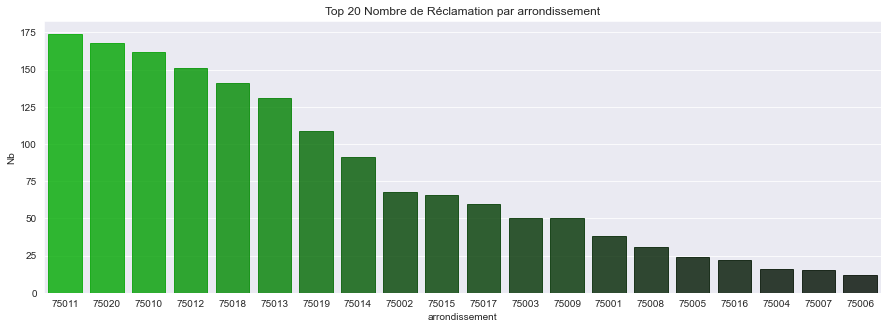

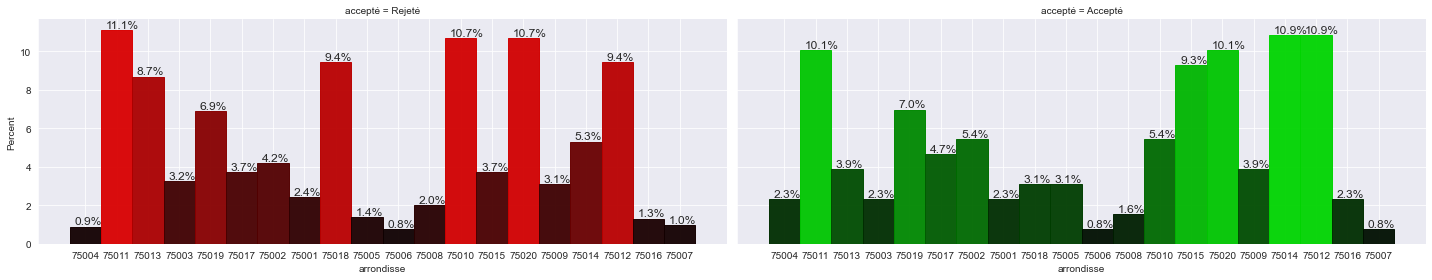

In [13]:
# Création d'une fonction permettant de récupérer un graphique de type top 5 nombre de réclamation par x.
# On permet aussi de comparer en fonction de si la variable est acceptée ou non.

sns.set_style("darkgrid")
#plt.style.use("dark_background")

def top5plot(column, title="", k=5, comparison="yes"):
    
    if title == "": title = column 
    
    df_subplots = df.copy()
    
    df_plot = df.groupby([column]).count().sort_values(by="geometry", ascending=False)
    for x in df_subplots[column].value_counts().tail(len(df_subplots[column].value_counts()) - k).index:
        df_subplots.loc[df_subplots[column] == x, df_subplots.columns] = np.nan
    df_subplots.dropna(inplace=True)
    df_subplots["count"] = df_subplots[column].value_counts()[df_subplots[column]].values
    df_subplots = df_subplots.sort_values(by="count", ascending=False)
    df_plot = df_plot.head(k)
    
    plt.figure(figsize=(15,5))
    plt.title("Top " + str(k) +" Nombre de Réclamation par " + title)
    ax = sns.barplot(x=df_plot.index, y = df_plot.geometry, order=df_plot.index)

    plt.ylabel("Nb")
    plt.xlabel(title)

    for bar in ax.patches:
        height= ax.patches[0].get_height()*1.5
        bar.set_color((0, bar.get_height()/(height), 0, 0.8))
    
    if comparison == "yes":
        g = sns.FacetGrid(df_subplots, col="accepté", height=4, aspect=2.5)
        g.map(sns.histplot, 
              column,
              stat="percent",
              hue = df_subplots.accepté,
              palette = {"Rejeté":"red", "Accepté":"green"})

        nb = 0
        for ax in g.axes[0]:
            for p in (ax.patches):
                if nb == 0:
                    p.set_color((p.get_height()/(height/k), 0, 0, 0.95))
                else:
                    p.set_color((0, p.get_height()/(height/k), 0, 0.95))
                percentage = '{:.1f}%'.format(p.get_height())
                x = p.get_x() + p.get_width() / 2 - 0.35
                y = p.get_y() + p.get_height() + 0.1
                ax.annotate(percentage, (x, y), size = 12)
            nb = 1
        
    #plt.savefig(("Top " + str(k) +" Nombre de Réclamation par " + title + ".png"), transparent=True, edgecolor = "none", bbox_inches="tight")
        
# Création d'un graphique décrivant les arrondissements recevant le plus de réclamations

top5plot("arrondisse", "arrondissement", len(df.arrondisse.unique()))

C:\Users\dumon\anaconda3\envs\geo_env\lib\site-packages\seaborn\_statistics.py:371: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum() * 100
C:\Users\dumon\anaconda3\envs\geo_env\lib\site-packages\seaborn\_statistics.py:371: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum() * 100


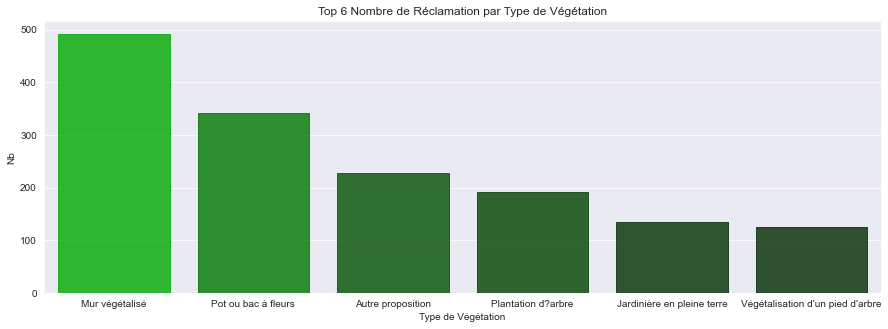

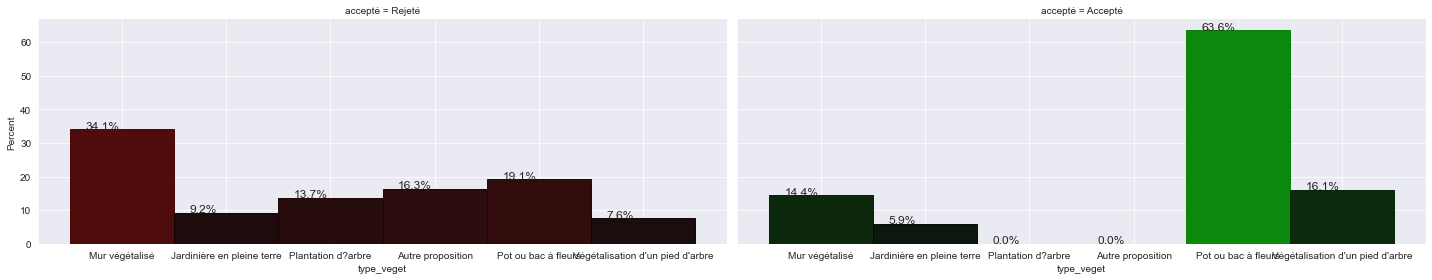

In [14]:
# Création d'un graphique décrivant les type de végétations recevant le plus de réclamations

top5plot("type_veget", "Type de Végétation", 6)

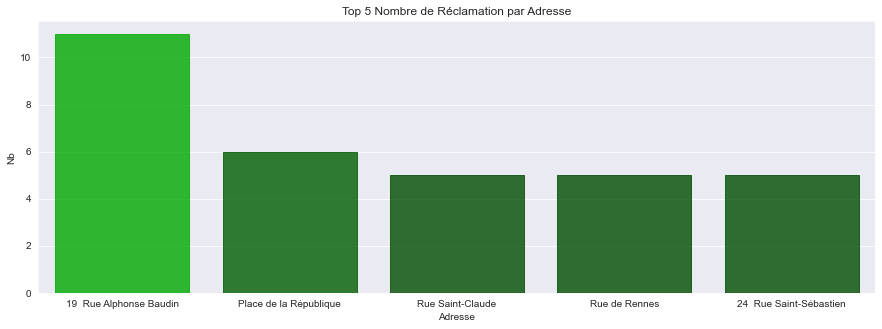

In [15]:
# Création d'un graphique décrivant les adresses recevant le plus de réclamations.
top5plot("adresse", "Adresse", 5, "")

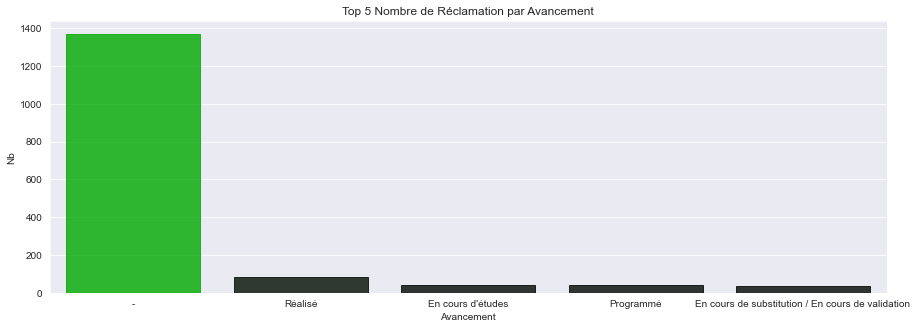

In [16]:
top5plot("avancement", "Avancement", 5, "")
# On remarque que la plupart des réclamations n'ont pas de commentaire lié à l'avancement.
# Cela signifie soit que la réclamation a été refusée soit qu'elle n'a pas encore été traitée.
# Au vu de la colonne "état de la proposition", on peut en déduire que "-" signifie "Refusé".
# Dans les deux cas, nous considérerons la réclamation comme refusée.

# 3 - Analyse des données

In [17]:
import scipy.stats as ss

# On calcule le V de cramer à l'aide d'une fonction prenant une matrice de confusion en argument.

def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [18]:
# On créé un tableau de corrélation en appliquant la fonction à chaque ligne et colonne.
v_cramer = pd.DataFrame(index = df.drop(columns="geometry").columns, columns = df.drop(columns="geometry").columns)
for r in df.drop(columns="geometry").columns:
    for c in df.drop(columns="geometry").columns:
        v_cramer.loc[r, c] = cramers_corrected_stat(pd.crosstab(df[r], df[c]))
v_cramer

,commentair,arrondisse,type_veget,adresse,numero,etat_de_la_proposition,avancement,propositio,accepté
commentair,1.0,0.0,0.0,0.0,0.654887,0.201517,0.0,0.450803,0.0
arrondisse,0.0,1.0,0.032446,0.301373,0.101645,0.126781,0.0799,0.089798,0.09857
type_veget,0.0,0.032446,1.0,0.238815,0.0,0.437587,0.292673,0.186247,0.311365
adresse,0.0,0.301373,0.238815,1.0,0.0,0.264833,0.304561,0.0,0.304271
numero,0.654887,0.101645,0.0,0.0,1.0,0.122726,0.089472,0.150575,0.138704
etat_de_la_proposition,0.201517,0.126781,0.437587,0.264833,0.122726,1.0,0.705759,0.696255,0.763068
avancement,0.0,0.0799,0.292673,0.304561,0.089472,0.705759,1.0,0.259064,0.999048
propositio,0.450803,0.089798,0.186247,0.0,0.150575,0.696255,0.259064,1.0,0.421172
accepté,0.0,0.09857,0.311365,0.304271,0.138704,0.763068,0.999048,0.421172,0.995777


<AxesSubplot:>

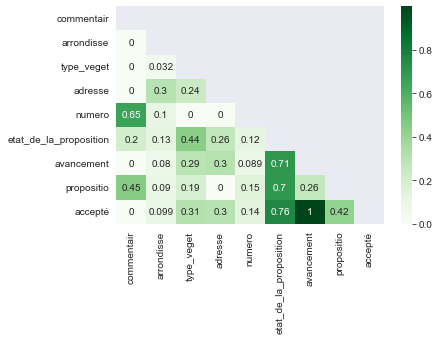

In [19]:
# On visualise le tableau avec une heatmap.
#plt.style.use("dark_background")

sns.heatmap(v_cramer.astype("float64"), mask=np.triu(v_cramer.astype("str")), cmap="Greens", annot= True)


#plt.savefig(("Cramer heatmap"), transparent=True, edgecolor = "none", bbox_inches="tight")

In [20]:
# On calcule une colonne latitude et une lognitude à l'aide de la colonne géométrie
df["lat"] = df.geometry.astype("str").apply(lambda x: x.split()[2].replace(")","")).astype("float64")
df["lon"] = df.geometry.astype("str").apply(lambda x: x.split()[1].replace("(","")).astype("float64")
df

,commentair,arrondisse,type_veget,adresse,numero,etat_de_la_proposition,avancement,propositio,geometry,accepté,lat,lon
0,-,75008,Pot ou bac à fleurs,rue corvetto,S2014G3193,proposition réalisable et retenue dans les 200...,Réalisé,-,POINT (2.31833 48.87950),Accepté,48.879505,2.318327
1,Tonelle,75004,Mur végétalisé,1 Rue du Renard,S2014H3595,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car il exis...,POINT (2.35144 48.85761),Rejeté,48.857609,2.351438
2,Passage piéton mal aménagé pour passage pousse...,75011,Jardinière en pleine terre,2 Rue Pelée,S2014G2801,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car elle co...,POINT (2.37019 48.85980),Rejeté,48.859801,2.370190
3,pas de commentaires,75011,Mur végétalisé,19 Rue Alphonse Baudin,S2014I4684,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car le trot...,POINT (2.37005 48.86125),Rejeté,48.861250,2.370046
4,pas de commentaires,75013,Plantation d?arbre,124 Boulevard Vincent Auriol,S2014I1994,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car le trot...,POINT (2.36236 48.83326),Rejeté,48.833259,2.362365
...,...,...,...,...,...,...,...,...,...,...,...,...
1574,-,75013,Mur végétalisé,21 Avenue d'Italie,S2014G4372,proposition réalisable techniquement mais non ...,-,-,POINT (2.35651 48.82882),Rejeté,48.828821,2.356510
1575,mur qui donne sur la réserve d'eau de la rue s...,75020,Mur végétalisé,18 Rue Stendhal,S2014I5143,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car elle co...,POINT (2.40186 48.86155),Rejeté,48.861554,2.401860
1576,-,75010,Mur végétalisé,5-7 Rue Legouvé,S2014G3619,proposition réalisable techniquement mais non ...,-,-,POINT (2.36135 48.87256),Rejeté,48.872555,2.361347
1577,-,75012,Pot ou bac à fleurs,Rue Marie Benoist,S2014H177,proposition réalisable techniquement mais non ...,-,-,POINT (2.39351 48.84661),Rejeté,48.846615,2.393505


<AxesSubplot:title={'center':'Nombre de réclamations par arrondissement de Paris'}>

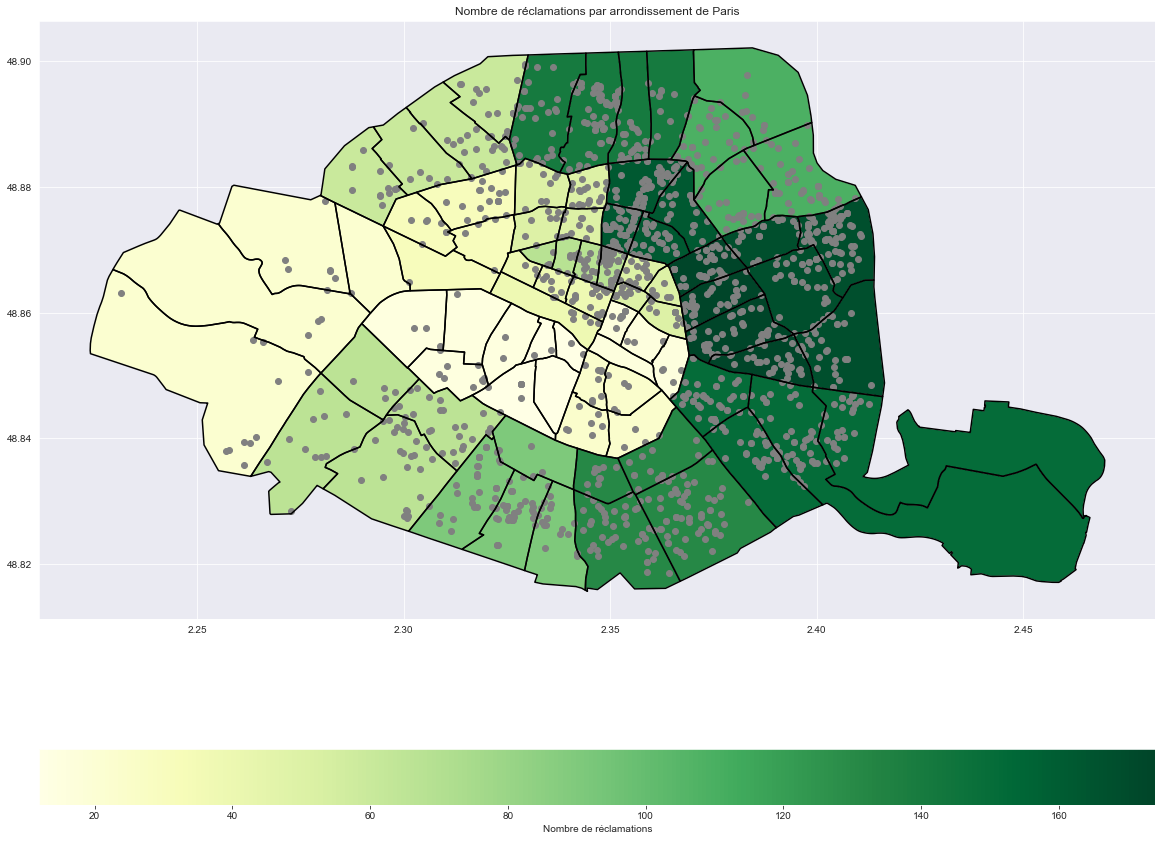

In [21]:
# on créé un mapping afin de localiser les réclamations par arrondissement.
df_paris = gpd.read_file("quartier_paris.geojson")

df_paris["arrondisse"] = "750" + df_paris.c_ar.astype("str").apply(lambda x: "0" + x if len(x) == 1 else x)

df_paris["nb_arr"] = df.arrondisse.value_counts()[df_paris["arrondisse"]].values

ax = df_paris["geometry"].boundary.plot(figsize=(20,16), color="black")
ax.set_title("Nombre de réclamations par arrondissement de Paris")
df_paris.plot(column=df_paris.nb_arr, ax=ax, cmap='YlGn', legend=True, legend_kwds={"label": "Nombre de réclamations", "orientation":"horizontal"})
df.plot(ax=ax, color ="gray")


In [22]:
# On créé une nouvelle variable décrivant si l'utilisateur a laissé un commentaire ou non.
df["commentaire?"] = np.where((df["commentair"] == "-") | (df["commentair"] == "pas de commentaires"), 0, 1)

df

,commentair,arrondisse,type_veget,adresse,numero,etat_de_la_proposition,avancement,propositio,geometry,accepté,lat,lon,commentaire?
0,-,75008,Pot ou bac à fleurs,rue corvetto,S2014G3193,proposition réalisable et retenue dans les 200...,Réalisé,-,POINT (2.31833 48.87950),Accepté,48.879505,2.318327,0
1,Tonelle,75004,Mur végétalisé,1 Rue du Renard,S2014H3595,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car il exis...,POINT (2.35144 48.85761),Rejeté,48.857609,2.351438,1
2,Passage piéton mal aménagé pour passage pousse...,75011,Jardinière en pleine terre,2 Rue Pelée,S2014G2801,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car elle co...,POINT (2.37019 48.85980),Rejeté,48.859801,2.370190,1
3,pas de commentaires,75011,Mur végétalisé,19 Rue Alphonse Baudin,S2014I4684,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car le trot...,POINT (2.37005 48.86125),Rejeté,48.861250,2.370046,0
4,pas de commentaires,75013,Plantation d?arbre,124 Boulevard Vincent Auriol,S2014I1994,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car le trot...,POINT (2.36236 48.83326),Rejeté,48.833259,2.362365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,-,75013,Mur végétalisé,21 Avenue d'Italie,S2014G4372,proposition réalisable techniquement mais non ...,-,-,POINT (2.35651 48.82882),Rejeté,48.828821,2.356510,0
1575,mur qui donne sur la réserve d'eau de la rue s...,75020,Mur végétalisé,18 Rue Stendhal,S2014I5143,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car elle co...,POINT (2.40186 48.86155),Rejeté,48.861554,2.401860,1
1576,-,75010,Mur végétalisé,5-7 Rue Legouvé,S2014G3619,proposition réalisable techniquement mais non ...,-,-,POINT (2.36135 48.87256),Rejeté,48.872555,2.361347,0
1577,-,75012,Pot ou bac à fleurs,Rue Marie Benoist,S2014H177,proposition réalisable techniquement mais non ...,-,-,POINT (2.39351 48.84661),Rejeté,48.846615,2.393505,0


In [23]:
# On créé une variable faisant le compte des réclamations par arrondissement.
df["nombre_par_arr"] = df.arrondisse.value_counts()[df["arrondisse"]].values
df

,commentair,arrondisse,type_veget,adresse,numero,etat_de_la_proposition,avancement,propositio,geometry,accepté,lat,lon,commentaire?,nombre_par_arr
0,-,75008,Pot ou bac à fleurs,rue corvetto,S2014G3193,proposition réalisable et retenue dans les 200...,Réalisé,-,POINT (2.31833 48.87950),Accepté,48.879505,2.318327,0,31
1,Tonelle,75004,Mur végétalisé,1 Rue du Renard,S2014H3595,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car il exis...,POINT (2.35144 48.85761),Rejeté,48.857609,2.351438,1,16
2,Passage piéton mal aménagé pour passage pousse...,75011,Jardinière en pleine terre,2 Rue Pelée,S2014G2801,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car elle co...,POINT (2.37019 48.85980),Rejeté,48.859801,2.370190,1,174
3,pas de commentaires,75011,Mur végétalisé,19 Rue Alphonse Baudin,S2014I4684,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car le trot...,POINT (2.37005 48.86125),Rejeté,48.861250,2.370046,0,174
4,pas de commentaires,75013,Plantation d?arbre,124 Boulevard Vincent Auriol,S2014I1994,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car le trot...,POINT (2.36236 48.83326),Rejeté,48.833259,2.362365,0,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,-,75013,Mur végétalisé,21 Avenue d'Italie,S2014G4372,proposition réalisable techniquement mais non ...,-,-,POINT (2.35651 48.82882),Rejeté,48.828821,2.356510,0,131
1575,mur qui donne sur la réserve d'eau de la rue s...,75020,Mur végétalisé,18 Rue Stendhal,S2014I5143,Propositions non réalisables techniquement,-,la proposition n'a pas été retenue car elle co...,POINT (2.40186 48.86155),Rejeté,48.861554,2.401860,1,168
1576,-,75010,Mur végétalisé,5-7 Rue Legouvé,S2014G3619,proposition réalisable techniquement mais non ...,-,-,POINT (2.36135 48.87256),Rejeté,48.872555,2.361347,0,162
1577,-,75012,Pot ou bac à fleurs,Rue Marie Benoist,S2014H177,proposition réalisable techniquement mais non ...,-,-,POINT (2.39351 48.84661),Rejeté,48.846615,2.393505,0,151


Les cellules suivantes prennent environ 20 minutes à faire tourner, par conséquent elles sont en commentaire afin de ne pas être obligé de les utiliser pour avancer dans le code.

In [24]:
# %time
# def adresseParserEnvType(adresse, arrondissement):

#     url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(adresse) + ", Île-de-France," + str(int(arrondissement)) +'?format=json'
    
#     response = requests.get(url).json()
    
#     return response[0]["type"] if response != [] else "-"

# arr = []
# for x, y in zip(df.adresse, df.arrondisse):
#     arr.append(adresseParserEnvType(x, y))


In [25]:
# arr
# df["environement_type"] = arr
# df.environement_type.value_counts().head(15).index

In [26]:
# from sklearn.preprocessing import LabelBinarizer
# df2 = pd.DataFrame(LabelBinarizer().fit_transform(df["environement_type"]))
# # On garde uniquement les valeurs les plus grandes afin de ne pas créer trop de colonnes.
# df2 = df2[df2.columns.where(df2.sum() > 10).dropna()]
# # On renome les colonnes en fonction du type d'environnemnet auquel elles correspondent.
# for x, y in zip(df2.sum().sort_values(ascending=False).index, df["environement_type"].value_counts().index):
#     df2.rename(columns={x:y}, inplace=True)
# # On rajoute notre One-hot encoding au dataframe initial.
# df2.info()

In [27]:
# df = df.join(df2)
# df.info()

In [28]:
from sklearn.preprocessing import LabelBinarizer
df2 = pd.DataFrame(LabelBinarizer().fit_transform(df["type_veget"]))
# On garde uniquement les valeurs les plus grandes afin de ne pas créer trop de colonnes.
df2 = df2[df2.columns.where(df2.sum() > 100).dropna()]
# On renome les colonnes en fonction du type de végétation auquel elles correspondent.
for x, y in zip(df2.sum().sort_values(ascending=False).index, df["type_veget"].value_counts().index):
    df2.rename(columns={x:y}, inplace=True)
# On rajoute notre One-hot encoding au dataframe initial.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Autre proposition                 1579 non-null   int32
 1   Jardinière en pleine terre        1579 non-null   int32
 2   Mur végétalisé                    1579 non-null   int32
 3   Plantation d?arbre                1579 non-null   int32
 4   Pot ou bac à fleurs               1579 non-null   int32
 5   Végétalisation d'un pied d'arbre  1579 non-null   int32
dtypes: int32(6)
memory usage: 37.1 KB


In [29]:
df = df.join(df2)
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   commentair                        1579 non-null   object  
 1   arrondisse                        1579 non-null   object  
 2   type_veget                        1579 non-null   object  
 3   adresse                           1579 non-null   object  
 4   numero                            1579 non-null   object  
 5   etat_de_la_proposition            1579 non-null   object  
 6   avancement                        1579 non-null   object  
 7   propositio                        1579 non-null   object  
 8   geometry                          1579 non-null   geometry
 9   accepté                           1579 non-null   object  
 10  lat                               1579 non-null   float64 
 11  lon                               1579 non-null 

# 4 - Prédiction du statut

In [30]:
# On remplace la variable cible "Accepté" par des valeurs binaires afin de pouvoir la prédire
df["accepté"] = np.where((df["avancement"] == "Réalisé") | (df["avancement"] == "Programmé"), 1, 0)

df["accepté"].value_counts(normalize=True)

0    0.918303
1    0.081697
Name: accepté, dtype: float64

In [31]:
>>> from sklearn import neighbors
>>> from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [32]:
# Les variables en commentaire viennnent du code qui prends 20 minutes à tourner.

train_x = [#'house', 'residential', 'pedestrian', 'primary', 'secondary',
       #'introuvable', 'tertiary', 'footway', 'living_street', 'service', 'restaurant', 'unclassified', 
    "nombre_par_arr", "lat", "lon", "commentaire?", "Autre proposition", "Jardinière en pleine terre", "Mur végétalisé", "Plantation d?arbre", "Pot ou bac à fleurs", "Végétalisation d'un pied d'arbre"]

# On effectue un train_test split afin de mesurer l'overfitting.

X_train, X_test, y_train, y_test = train_test_split(df[train_x], df["accepté"], test_size=0.33)

# On selectionne les meilleurs paramètres grace à la CVGrid.

parameters = {'n_neighbors':range(1, 100), 'weights':['uniform', 'distance']}
clf = GridSearchCV(neighbors.KNeighborsClassifier(), parameters)
clf.fit(X_train, y_train)

print(clf.best_params_," : ", clf.best_score_)

{'n_neighbors': 14, 'weights': 'uniform'}  :  0.9224268979701332


In [64]:
# On instancie notre modèle avec 9 voisins car GirdSearchCV sélectionne entre 6 et 14 voisins comme optimaux en général
model = neighbors.KNeighborsClassifier(9)

# On entraine notre modèle

model.fit(X_train, y_train)
model.score(X_train, y_train)


0.9252601702932829

C:\Users\dumon\anaconda3\envs\geo_env\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


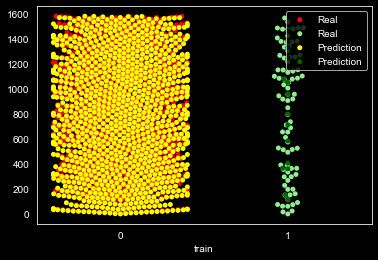

In [65]:
# On effectue une prédiction et on la compare au réel, d'abord en test et à l'aide d'un swarmplot
#sns.set_style("white")
#plt.style.use("dark_background")
prediction = model.predict(X_train)
sns.swarmplot(y=X_train.index, x=y_train, label="Real", palette={0:"red", 1:"lightgreen"}, alpha = 1)
sns.swarmplot(y=X_train.index, x=prediction, label="Prediction", palette={0:"yellow", 1:"darkgreen"}, alpha=1)
plt.legend(loc="upper right")
plt.xlabel("train")
plt.savefig(("train prediction"), transparent=True, edgecolor = "none", bbox_inches="tight")
# On remarque qu'il possède une faible précision pour les variables qui sont acceptées, et il n'en place pas beaucoup dedans.

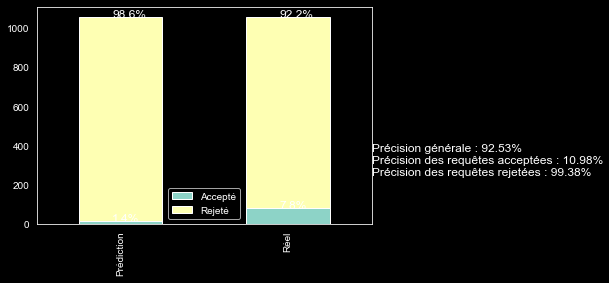

In [66]:
# On visualise un autre graphique afin de décrire ces variables plus en détail, de façon à mettre la précision en avant.
df_verif = pd.DataFrame(prediction).reset_index(drop=True).join(pd.DataFrame(y_train).reset_index(drop=True))
df_verif.rename(columns = {0:'Prédiction', "accepté": "Réel"}, inplace = True)
df_stack = pd.DataFrame(df_verif.sum())
df_stack[1] = df_verif.count()[0] - df_stack[0]
stackplot = df_stack.plot(kind='bar', stacked=True)

df_verif["Match"] = df_verif.Prédiction == df_verif.Réel
Précision_Générale = df_verif.Match.value_counts()[1]/df_verif.count()[0]
df_accepté = df_verif.where(df_verif.Réel==1).dropna()
Précision_Accepté = df_accepté.Match.value_counts()[1]/df_accepté.count()[0]
df_rejeté = df_verif.where(df_verif.Réel==0).dropna()
Précision_Rejeté = df_rejeté.Match.value_counts()[1]/df_rejeté.count()[0]

for p in stackplot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/df_verif.count()[0])
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        stackplot.annotate(percentage, (x, y), size = 12)
        
stackplot.annotate("Précision générale : " + str('{:.2f}%'.format(Précision_Générale*100))
                   + "\nPrécision des requêtes acceptées : " + str('{:.2f}%'.format(Précision_Accepté*100))
                   + "\nPrécision des requêtes rejetées : " + str('{:.2f}%'.format(Précision_Rejeté*100))
                   , (1.5, 250), size = 12)
        
plt.legend(["Accepté", "Rejeté"])
#plt.savefig(("train prediction stacked"), transparent=True, edgecolor = "none", bbox_inches="tight")

In [54]:
# On vérifie l'overfitting à l'aide d'une cross-validation
cross_val_score(model, X_train, y_train, cv=5).mean()

0.9177054457658945

In [55]:
# On test le modèle avec notre test_set
model.score(X_test, y_test)

0.9118773946360154

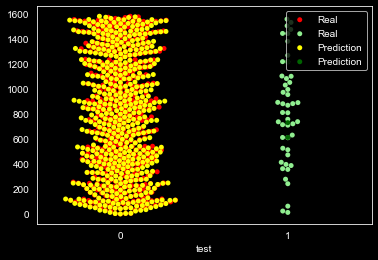

In [62]:
# On créé à nouveau les graphiques afin de visualiser les différences
prediction = model.predict(X_test)
sns.swarmplot(x=y_test, y=y_test.index, label="Real", palette={0:"red", 1:"lightgreen"})
sns.swarmplot(x=prediction, y=y_test.index, label="Prediction", palette={0:"yellow", 1:"darkgreen"}, alpha = 1)
plt.legend(loc="upper right")
plt.xlabel("test")
plt.savefig(("test prediction"), transparent=True, edgecolor = "none", bbox_inches="tight")
# A score of around 90% on test variables, the model seems good.

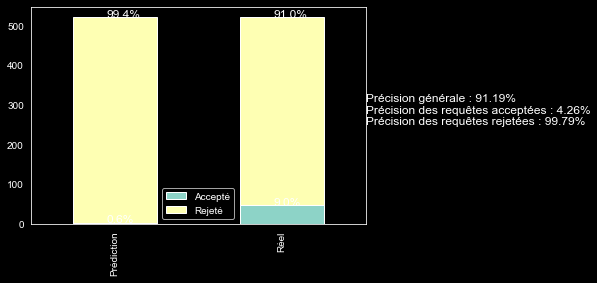

In [58]:
df_verif = pd.DataFrame(prediction).reset_index(drop=True).join(pd.DataFrame(y_test).reset_index(drop=True))
df_verif.rename(columns = {0:'Prédiction', "accepté": "Réel"}, inplace = True)
df_stack = pd.DataFrame(df_verif.sum())
df_stack[1] = df_verif.count()[0] - df_stack[0]
stackplot = df_stack.plot(kind='bar', stacked=True)

df_verif["Match"] = df_verif.Prédiction == df_verif.Réel
Précision_Générale = df_verif.Match.value_counts()[1]/df_verif.count()[0]
df_accepté = df_verif.where(df_verif.Réel==1).dropna()
Précision_Accepté = df_accepté.Match.value_counts()[1]/df_accepté.count()[0]
df_rejeté = df_verif.where(df_verif.Réel==0).dropna()
Précision_Rejeté = df_rejeté.Match.value_counts()[1]/df_rejeté.count()[0]

for p in stackplot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/df_verif.count()[0])
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        stackplot.annotate(percentage, (x, y), size = 12)
        
stackplot.annotate("Précision générale : " + str('{:.2f}%'.format(Précision_Générale*100))
                   + "\nPrécision des requêtes acceptées : " + str('{:.2f}%'.format(Précision_Accepté*100))
                   + "\nPrécision des requêtes rejetées : " + str('{:.2f}%'.format(Précision_Rejeté*100))
                   , (1.5, 250), size = 12)
        
plt.legend(["Accepté", "Rejeté"])
#plt.savefig(("test prediction stacked"), transparent=True, edgecolor = "none", bbox_inches="tight")

# Conclusion
Là où notre modèle possède une grande précision, il n'est pas forcément très bon car sa précision est liée au grand nombre de variables rejetées. On remarque que sa précision sur les variables acceptées est bien plus faible - et ce probablement du au faible nombre de variables acceptées.
Cela l'a probablement donc empéché de bien s'entrainer. De plus le modèle KNeighbors se base sur les autres données, il observe donc la vaste majorité des données dans la catégorie rejetée, et va donc avoir tendance à rejeter la plupart des données.

En général, on remarque qu'il est possible de prédire l'avancement des requpetes avec des variables qui semblent n'avoir aucune corrélation direct.
Le choix du modèle est très important, mais il se base sur les données possédées, et cela rend le data processing, cleaning et le feature engineering encore plus important.
Nous pouvons conclure que la manipulation de la base de données permet de faire ressortir des informations autrement invisibles à l'oeil humain.

# Annexe : Autres tests
Nous avons effectué d'autres tests de modèle, et ce plus particulièrement en pré-processing des données afin d'avoir une idée d'où aller. Voici quelques un d'entres eux. 

In [ ]:
newdf = gpd.read_file("du-vert-pres-de-chez-moi.geojson")

In [ ]:
newdf = newdf[["avancement", "type_veget", "adresse", "arrondisse"]]

In [ ]:
newdf = newdf.where(newdf.avancement != "-").dropna()

In [ ]:
newdf["avancement"] = np.where((newdf["avancement"] == "Réalisé") | (newdf["avancement"] == "Programmé"), 1, 0)

newdf["avancement"].value_counts(normalize=True)

In [ ]:
newdf.reset_index(drop = True, inplace = True)
newdf

In [ ]:
newdf = newdf.join(pd.get_dummies(newdf[["type_veget"]]))
newdf = newdf.join(pd.get_dummies(newdf[["adresse"]]))
newdf = newdf.join(pd.get_dummies(newdf[["arrondisse"]].astype("int").astype("str")))
newdf.drop(columns="type_veget", inplace=True)
newdf.drop(columns="adresse", inplace=True)
newdf.drop(columns="arrondisse", inplace=True)

In [ ]:
y = newdf["avancement"]
X = newdf.drop(columns="avancement")

In [ ]:
X

In [ ]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
np.set_printoptions(precision=3, suppress=True)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
reg0 = linear_model.LinearRegression()
reg0.fit(X, y)
reg0.score(X, y)

In [ ]:
reg0.score(X, y)

In [ ]:
prediction = reg0.predict(X)
sns.scatterplot(x=X.index, y=y, label="Real")
sns.scatterplot(x=X.index, y=prediction, label="Prediction", color="green", alpha=0.2)

In [ ]:
reg_randomforestclassifier = RandomForestClassifier()
reg_randomforestclassifier.fit(X, y)
reg_randomforestclassifier.score(X, y)

reg_KNeighborsClassifier = KNeighborsClassifier()
reg_KNeighborsClassifier.fit(X, y)
reg_KNeighborsClassifier.score(X, y)

In [ ]:
reg_randomforestclassifier.score(X, y)

In [ ]:
prediction = reg_randomforestclassifier.predict(X)
sns.scatterplot(x=X.index, y=y, label="Real")
sns.scatterplot(x=X.index, y=prediction, label="Prediction", color="green", alpha=0.2)

In [ ]:
reg_KNeighborsClassifier.score(X, y)